<img src="img/usmlogo.png" style="float:right;height:85px"> <img src="img/dilogo.png" style="float:left;height:90px">
<center>
    <h1> Laboratorio 1 </h1>
    <h2> Profesor: Ricardo Ñanculef </h2>
    <h3> Ayudante: Gabriel Ortega </h3>
    <h4> Gabriel Carmona; 201773509-0 ; Malla Nueva </h4>
    <h4> Jorge Ludueña ; 201773507-4 ; Malla Nueva </h4>
</center>
<p>
<center><h4>Marzo 2019</h4></center>
</p>

## Instrucciones


La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día 5 de abril.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab1.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. Este notebook presenta ciertas preguntas marcadas con **O:** que indican que para los alumnos de malla nueva es opcional, pero obligatoria para los alumnos de malla vieja. En el caso de haber una pareja con un integrante de malla nueva y uno de malla vieja, se considera malla vieja. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará reprobación del laboratorio con nota 0 (lo que implica reprobar el ramo con nota 0) además de la notificación correspondiente al Profesor.** 

**Puntos bonus para todos:** Debido a que a veces hay preguntas que les piden una conclusión utilizando ciertos elementos, si lo desea, puede agregar elementos extra para hacer una mejor conclusión o concluir algo más que tenga sentido con lo anterior; estos gráficos pueden otorgar puntos bonus dependiendo de su calidad y del comentario que lo acompañe (con un máximo de 3 puntos bonus por pregunta, no acumulables si alcanza la nota máxima)

## Librerias importadas.

In [144]:
import numpy as np
import csv
import matplotlib as mpl 
import matplotlib.pyplot as plt
from array import array
import random
import math

## 1. Sarcasmo en Reddit (30p)

Reddit es una página web muy conocida que, en simples palabras, es una compilación de muchos foros llamados "subreddits", en esta sección trabajará con un dataset que contiene una compilación de comentarios realizados por usuarios en distintos subreddits, los que vienen con una indicación de si el comentario es sarcástico o no.
[Fuente](https://www.kaggle.com/sherinclaudia/sarcastic-comments-on-reddit)

Se recopilan los datos de distinta manera para las distintas preguntas

In [145]:
pregunta1 = {}
pregunta2 = {}
s = []
n = []
k = 0
with open("reddit.csv") as File:
    reader = csv.reader(File)
    for row in reader:
        if (k == 0):
            k = 1
        else:
            if (row[3] not in pregunta1.keys()):
                pregunta1[row[3]] = 0
                pregunta2[row[3]] = [0,0]
            if(row[0] == '0'):
                pregunta1[row[3]] += 1
                pregunta2[row[3]][0] += 1
                n.append([int(row[7].split("-")[0]),int(row[7].split("-")[1])]) 
            else:
                pregunta1[row[3]] -= 1
                pregunta2[row[3]][1] += 1
                s.append([int(row[7].split("-")[0]),int(row[7].split("-")[1])])

>a) **O:** Cargue los datos y resuma brevemente que contiene el dataset 

El data set contiene comentarios pertenecientes a la pagina web reddit, las celdas contienen, si el respectivo comentario es sarcástico o no, definido por un 1 o un 0 respectivamente , el contenido del comentario, el usuario, el subreddit en el cual se originó, el puntaje del comentario, el año y mes de publicación, fecha exacta con hora de publicación y el comentario que se comento

>b) ¿Existe algún subreddit donde los comentarios no sarcásticos predominen? ¿Y alguno donde predominen los comentarios sarcásticos? 


El siguiente programa calcula la cantidad de subreddits en el cual predomina el sarcasmo, el no sarcasmo, o que no predomina ninguno.

In [146]:
sar = 0
nosar = 0
neutral = 0
for a in pregunta1.values():
    if(a > 0):
        nosar += 1
    elif(a < 0):
        sar += 1
    else:
        neutral += 1

print("La cantidad de subreddits donde predomina el sarcasmo son " + str(sar))
print("La cantidad de subreddits donde no predomina el sarcasmo son " + str(nosar))
print("La cantidad de subreddits donde ninguno de los predomina son " + str(neutral))

La cantidad de subreddits donde predomina el sarcasmo son 3823
La cantidad de subreddits donde no predomina el sarcasmo son 9813
La cantidad de subreddits donde ninguno de los predomina son 1242


>c) Realice un top 10 con los subreddits que más se repiten en la etiqueta sin sarcasmo y un top 10 de los que más se repiten en la etiqueta con sarcasmo. ¿Existen similitudes/diferencias en ambas listas? ¿A qué se puede deber esto?

En el siguiente programa se busca los 10 subreddits que poseen más comentarios sarcásticos y los 10 subreddits que poseen más comentarios no sarcásticos.

In [147]:
sinsarcasmo = []
consarcasmo = []
for x,y in pregunta2.items():
    sinsarcasmo.append((y[0],x))
    consarcasmo.append((y[1],x))
sinsarcasmo.sort()
sinsarcasmo.reverse()
consarcasmo.sort()
consarcasmo.reverse()
i = 0
print("TOP 10 sin sarcasmo")
while (i<10):
    i+=1
    print (str(i) + " " + sinsarcasmo[i-1][1])
print(" ")
print("TOP 10 con sarcasmo")
i = 0
while (i<10):
    i+=1
    print (str(i) + " " + consarcasmo[i-1][1])

TOP 10 sin sarcasmo
1 AskReddit
2 politics
3 funny
4 leagueoflegends
5 worldnews
6 pics
7 pcmasterrace
8 nfl
9 news
10 nba
 
TOP 10 con sarcasmo
1 AskReddit
2 politics
3 worldnews
4 leagueoflegends
5 pcmasterrace
6 news
7 funny
8 pics
9 todayilearned
10 GlobalOffensive


Efectivamente existen subreddits que estan en ambos TOP 10, tanto no sarcástico como sarcástico. Esto se debe a que los subreddits que se presentan, son bastante populares, esto junto a que en estos se puede hablar tanto temas serios, como temas burlescos, por lo cual puede haber tanto comentarios sarcásticos como no sarcásticos.

>d) Construya una línea de tiempo (use la columna que estime más conveniente como eje de tiempo) y coloree los datos según su etiqueta de sarcasmo, comente lo que observa.

*Consejo: puede agrupar comentarios y contar el total que se registra en ese momento del tiempo en vez de graficar cada comentario en la línea.*

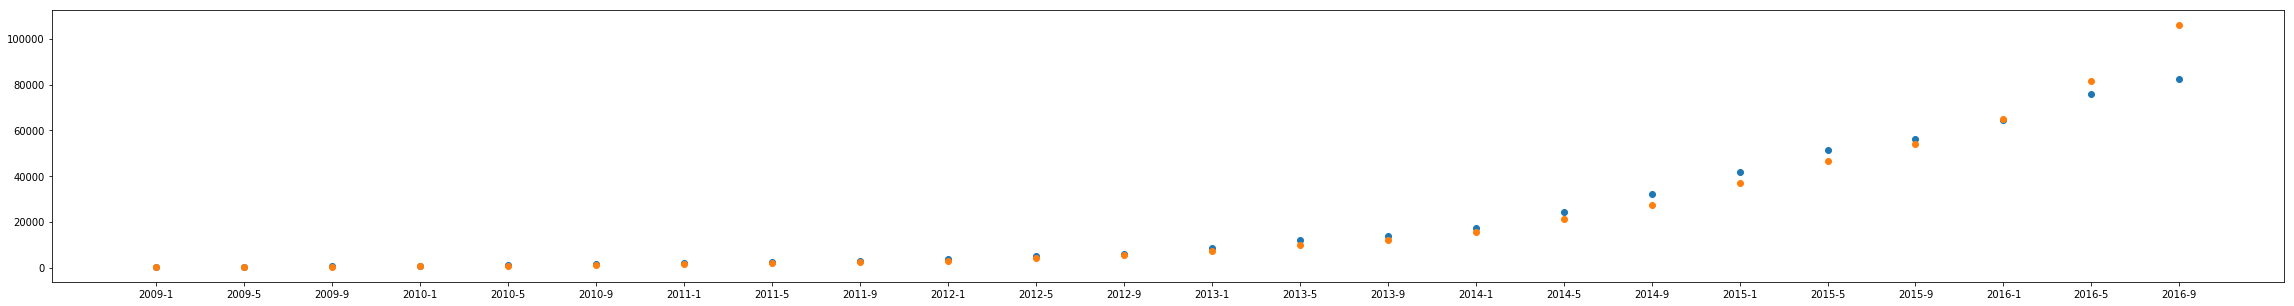

In [148]:
#Se calcula la cantidad de comentarios por mes, y los agrupa los valores cada 4 meses

s.sort()
n.sort()
count = 0
month = 0
dic= {}
sep = 4 #Con este valor se cambia la cantidad de meses agrupados


for a in s:
    if month == 0:
        cot = (a[0],a[1])
        dic[cot] = 1
        month = a[1]
    elif count < sep:
        if month != a[1]:
            count +=1
            month = a[1]
        dic[cot] += 1
    else:  
        count = 0
        cot = (a[0], a[1])
        dic[cot] = 1


count = 0
month = 0
dicn= {}

for b in n:
    if month == 0:
        cot = (b[0],b[1])
        dicn[cot] = 1
        month = b[1]
    elif count < sep:
        if month != b[1]:
            count +=1
            month = b[1]
        dicn[cot] += 1
    else:  
        count = 0
        cot = (b[0], b[1])
        dicn[cot] = 1
date = []
point =[]
for k,v in dic.items():
    date.append([k[0],k[1],v])

daten = []
for k,v in dicn.items():
    daten.append([k[0],k[1],v])
date.sort()
daten.sort()
fecha = []
point = []
fechant = []
pointn = []

for a,b,c in date:
    fecha.append(str(a)+"-"+str(b))
    point.append(c)

for a,b,c in daten:
    fechant.append(str(a)+"-" +str(b))
    pointn.append(c)

plt.figure(figsize=(40,5))
plt.scatter(fecha,point)
plt.scatter(fechant,pointn)
plt.show()





Se puede observar que tanto comentarios no sarcásticos, como sarcásticos, fuerno en un aumento relativamente parecidos a lo largo del tiempo, esto puede deberse a que la popularidad de reddit fuen en aumento a lo largo del tiempo, siendo más popular a fines del año 2016.

>e) Haga un histograma y boxplot de los puntajes de comentarios sarcásticos y no sarcásticos, comparelos y concluya a partir de lo que observa, puede agregar otro tipo de gráficos si desea para apoyar su conclusión.

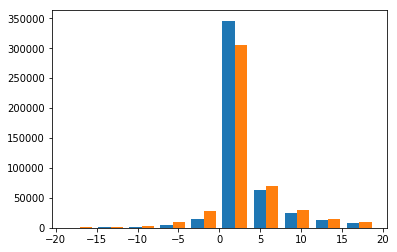

{'boxes': [<matplotlib.lines.Line2D at 0x7fdd9594bb00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdd992e2320>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdd992e2cf8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdd992e29b0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdd9594bc50>,
  <matplotlib.lines.Line2D at 0x7fdd9a63b710>]}

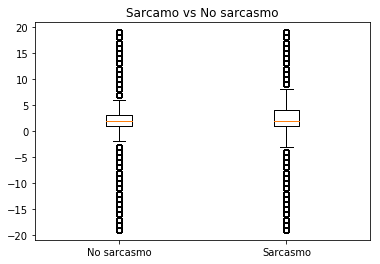

In [149]:
#Recopila los datos y los grafica en un boxplot y en un histograma

lista1 = []
lista2 = []
with open("reddit.csv") as  File:
    reader = csv.reader(File) 
    lista_sar = []
    lista_nosar = []
    k = 0
    for row in reader:
        if(k == 0):
            k = 1
        else:
            if(-20<int(row[4])<20):
                if(row[0] == '0'):
                    lista1.append(int(row[4]))
                else:
                    lista2.append(int(row[4]))

data = np.asarray(lista1)
data2 = np.asarray(lista2)
datamaximo = [data,data2]
plt.hist(datamaximo)
plt.show()
fig1, ax1 = plt.subplots()
ax1.set_title('Sarcamo vs No sarcasmo')
ax1.boxplot(datamaximo, labels=["No sarcasmo","Sarcasmo"])

Al comparar los boxplot se puede observar que de los comentarios sarcásticos y no sarcásticos, no presentan una predominancia el uno sobre el otro, ya que las medianas son cercanas entre ellas. Ahora bien, gracias al histograma y también las cajas del boxplot, se observa que los puntajes de los comentarios sarcásticos y no sarcásticos además de ser parecidos se oncentran en el mismo rango, que es entre 0 y 5 más o menos. 

## 2. Simulaciones 

Una de las gracias de tener una máquina con alta capacidad de cómputo es el poder realizar simulaciones. Las simulaciones nos permiten recrear experimentos que requieren una gran cantidad de datos, por ejemplo, lanzar un dado 10000 veces y determinar las probabilidades de cada resultado posible.


### 2.1 Lanzamiento de Agujas (30p)

Imagine que tiene un puñado de agujas ($n$ agujas) y las lanza al aire, estas agujas caen aleatoriamente dentro de un espacio de 20x20 unidades (asuma que la aguja puede quedar con una parte afuera y otra adentro si cae en alguno de los bordes/cerca de un borde de este espacio), este espacio tiene líneas horizontales cada 1 unidad en el eje Y, obviando los bordes inferior y superior de este espacio, usted está interesado en determinar la probabilidad de que una aguja atraviese cualquiera de estas líneas horizontales, para ello ha decidido simular este experimento utilizando el centroide de la aguja (posición donde cae) y el ángulo medido respecto a la horizontal que atraviesa el centroide $\alpha$ (ver imagen)

<img src="img/aguja.png" style="float:center;height:100px">

El largo de la aguja es el mismo que la separación entre las lineas horizontales (1 unidad)


Calcule la probabilidad utilizando $n =10,100,1000,10000,100000$ agujas

Puntos bonus por :
* (5) Probar con tamaños distintos del espacio y concluir comparando con los otros casos
* (5) Añadir 1 gráfico por cada $n$ donde se vea el espacio y las agujas después de caer, recuerde hacer un comentario respecto al gráfico, no solo incluirlo.

En esta parte realizamos las coordenadas del centroide n veces, para luego tirar un ángulo al azar entre 0 y 180.
Para así verificar si es que cortan las linas horizontales del espacio asumiendo que el centroide siempre cae adentro.
Esto mismo se realizó para todos los otros casos.

In [150]:
n1 = 10
n2 = 100
n3 = 1000
n4 = 10000
n5 = 100000

In [151]:
for x in [n1,n2,n3,n4,n5]:
    cant = 0
    i = 0
    while(i < x):
        pos_x = random.random()*20
        pos_y = random.random()*20
        ang = random.randint(0,180)
        y1 = pos_y+math.sin(math.radians(ang))*0.5
        y2 = pos_y-math.sin(math.radians(ang))*0.5
        x1 = pos_x+math.cos(math.radians(ang))*0.5
        x2 = pos_x-math.cos(math.radians(ang))*0.5
        if(y1 > int(pos_y)+1):
            cant+=1
        elif(y2 < int(pos_y)):
            cant+=1
        i+=1
    print("La probabilidad para " + str(x)+ " agujas es " + str(float(cant/x)))

La probabilidad para 10 agujas es 0.6
La probabilidad para 100 agujas es 0.69
La probabilidad para 1000 agujas es 0.63
La probabilidad para 10000 agujas es 0.6434
La probabilidad para 100000 agujas es 0.63674


En el siguiente código se probará con otros espacios para observar que sucede con la probabilidad.

El siguiente será un espacio de 40x40.

In [152]:
for x in [n1,n2,n3,n4,n5]:
    cant = 0
    i = 0
    while(i < x):
        pos_x = random.random()*40
        pos_y = random.random()*40
        ang = random.randint(0,180)
        y1 = pos_y+math.sin(math.radians(ang))*0.5
        y2 = pos_y-math.sin(math.radians(ang))*0.5
        x1 = pos_x+math.cos(math.radians(ang))*0.5
        x2 = pos_x-math.cos(math.radians(ang))*0.5
        if(y1 > int(pos_y)+1):
            cant+=1
        elif(y2 < int(pos_y)):
            cant+=1
        i+=1
    print("La probabilidad para " + str(x)+ " agujas es " + str(float(cant/x)))

La probabilidad para 10 agujas es 0.7
La probabilidad para 100 agujas es 0.64
La probabilidad para 1000 agujas es 0.65
La probabilidad para 10000 agujas es 0.6335
La probabilidad para 100000 agujas es 0.63319


Otro espacio utilizado será de 80x80.

In [153]:
for x in [n1,n2,n3,n4,n5]:
    cant = 0
    i = 0
    while(i < x):
        pos_x = random.random()*80
        pos_y = random.random()*80
        ang = random.randint(0,180)
        y1 = pos_y+math.sin(math.radians(ang))*0.5
        y2 = pos_y-math.sin(math.radians(ang))*0.5
        x1 = pos_x+math.cos(math.radians(ang))*0.5
        x2 = pos_x-math.cos(math.radians(ang))*0.5
        if(y1 > int(pos_y)+1):
            cant+=1
        elif(y2 < int(pos_y)):
            cant+=1
        i+=1
    print("La probabilidad para " + str(x)+ " agujas es " + str(float(cant/x)))

La probabilidad para 10 agujas es 0.6
La probabilidad para 100 agujas es 0.61
La probabilidad para 1000 agujas es 0.607
La probabilidad para 10000 agujas es 0.6352
La probabilidad para 100000 agujas es 0.63303


Despues de utilizar dos espacios distintos al pedido, se puede observar la probabilidad entre más agujas se lancen, más parecidos serán los valores entre los diferentes espacio. Esto quiere decir que independiente del tamaño del espacio utilizado, la probabilidad será cercana en todos los espacios.

### 2.2 Cadenas de Markov (40p)

Las cadenas de markov son un modelo estocástico para describir una secuencia de sucesos donde la probabilidad de ir a un estado siguiente depende solamente del estado actual, esto se puede modelar de la siguiente forma:

$$ S_{n+1} = S_{n}\cdot P$$

Donde $P$ se conoce como matriz de transición y $S_{i}$ las matrices de estado ($S_{0}$ es conocida). Una cadena de markov se dice regular si su matriz de transición es regular, esto quiere decir que alguna potencia de $P$ tiene todas sus entradas positivas (para este caso 0 no es positivo).

Si se tiene una cadena de markov regular, en algún momento de la secuencia se encontrará una matriz de estado tal que:

$$ S_{f} \cdot P = S_{f}$$ 

A esta matriz $S_{f}$ se le conoce como matriz estacionaria.

Si desea profundizar más:
- [MC 1](https://www.youtube.com/watch?v=uvYTGEZQTEs)
- [MC 2](https://www.youtube.com/watch?v=jtHBfLtMq4U)
- [MC 3](https://www.youtube.com/watch?v=P8DuuiINAo4&t)
- [MC 4](https://www.youtube.com/watch?v=31X-M4okAI0)
- [MC 5](https://www.youtube.com/watch?v=-kwnnNSGFMc)


**Enunciado**

Tres compañías de comida rápida están compitiendo por el primer lugar en la supremacía de comida rápida. 

* Si un cliente originalmente es fiel a "Sansafood" tiene un $65\%$ de probabilidad de quedarse fiel a esta, un $20\%$ de cambiarse a "LDS ltda" y un $15\%$ de cambiarse a "Wenzi's".

* Si un cliente originalmente es fiel a "LDS ltda" tiene un $40\%$ de probabilidad de quedarse fiel a esta, un $30\%$ de cambiarse a "Sansafood" y un $30\%$ de cambiarse a "Wenzi's".

* Si un cliente originalmente es fiel a "Wenzi's" tiene un $70\%$ de probabilidad de quedarse fiel a esta, un $10\%$ de cambiarse a "Sansafood" y un $20\%$ de cambiarse a "LDS ltda".

En un comienzo 200 clientes pertenecen a "Sansafood", 180 a "LDS ltda" y 20 a "Wenzi's".

>a) Identifique la matriz de transición y la matriz de estado inicial

Para este problema se utilizó una nomenclatura para acortar los nombres de la compañia:
    * S equivale a Sansafood
    * L equivale a LDS ltda
    * W equivale a Wenzi's
Matriz Transición

In [154]:
#Se creo la matriz de transición
p = np.array([[0.65,0.20,0.15],[0.30,0.40,0.30],[0.1,0.2,0.7]])
print("   S    L    W")
print("S "+str(p[0][0])+" "+str(p[0][1])+" "+str(p[0][2]))
print("L "+str(p[1][0])+"  "+str(p[1][1])+" "+str(p[1][2]))
print("W "+str(p[2][0])+"  "+str(p[2][1])+" "+str(p[2][2]))

   S    L    W
S 0.65 0.2 0.15
L 0.3  0.4 0.3
W 0.1  0.2 0.7


Matriz de estado inicial

In [155]:
s = np.array([[0.5,0.45,0.05]])
print("S " + str(s[0][0]))
print("L " + str(s[0][1]))
print("W " + str(s[0][2]))

S 0.5
L 0.45
W 0.05


>**O:** b) Haga un diagrama de transición 

<img src="img/diagrama.png" style="float:left;height:180px">

>**O:** c) ¿Este problema es un caso de una cadena de markov regular? ¿Por qué?

>d) ¿Existirá la matriz estacionaria en este caso? Si su respuesta es sí, obténgala.

Sí, existirá la matriz estacionaria, ya que este problema es un caso de una cadena de markov regular.
Matriz Estacionaria

In [156]:
#En esta parte, lo que se hace en aplicar la formula antes descrita hasta que la matriz de estado no cambia 
#entre el paso n y el paso n+1
while(1):
    s_trans = s.dot(p)
    if((s_trans == s).all()):
        break
    else:
        s = s_trans
print("    S          L           W")
print(s_trans)

    S          L           W
[[0.33333333 0.25       0.41666667]]


>e) Después de pasado mucho tiempo. ¿Quién tendrá una mayor cantidad de clientes? Asuma que la matriz de transición será válida por todo este periodo arbitrario de tiempo y no llegarán ni saldrán más clientes del mundo de comida rápida. **No realice esta simulación como una multiplicación de matrices**, use las probabilidades y las cantidades dadas. Compare con d) 

Aquí basicamente se va cambiando las poblaciones con ayuda de la matriz de estado en cada estado hasta que la matriz de estado sea igual entre el paso n y el paso n+1

In [157]:
p = np.array([[0.65,0.20,0.15],[0.30,0.40,0.30],[0.1,0.2,0.7]])
s = np.array([[0.5,0.45,0.05]])
i = 0
while(1):
    i+=1
    s_trans = s.dot(p)
    print("Tiempo " + str(i))
    clientes_S = s_trans[0][0]*400 
    clientes_W = s_trans[0][2]*400
    clientes_L = s_trans[0][1]*400
    if(clientes_S >= float(int(clientes_S)) +0.5):
        clientes_S = int(clientes_S) + 1
    else:
        clientes_S = int(clientes_S)
    if(clientes_L>= float(int(clientes_L)) +0.5):
        clientes_L = int(clientes_L) + 1
    else:
        clientes_L = int(clientes_L)
    if(clientes_W >= float(int(clientes_W)) +0.5):
        clientes_W = int(clientes_W) + 1
    else:
        clientes_L = int(clientes_L)
    print("Clientes Sansafood " + str(clientes_S))
    print("Clientes LDS ltda " + str(clientes_L))
    print("Clientes Wenzi's " + str(clientes_W))
    print("")
    if((s_trans == s).all()):
        break
    else:
        s = s_trans

Tiempo 1
Clientes Sansafood 186
Clientes LDS ltda 116
Clientes Wenzi's 98.00000000000001

Tiempo 2
Clientes Sansafood 166
Clientes LDS ltda 103
Clientes Wenzi's 131.3

Tiempo 3
Clientes Sansafood 152
Clientes LDS ltda 101
Clientes Wenzi's 148

Tiempo 4
Clientes Sansafood 144
Clientes LDS ltda 100
Clientes Wenzi's 156.32825000000003

Tiempo 5
Clientes Sansafood 139
Clientes LDS ltda 100
Clientes Wenzi's 161

Tiempo 6
Clientes Sansafood 136
Clientes LDS ltda 100
Clientes Wenzi's 164

Tiempo 7
Clientes Sansafood 135
Clientes LDS ltda 100
Clientes Wenzi's 165

Tiempo 8
Clientes Sansafood 134
Clientes LDS ltda 100
Clientes Wenzi's 166

Tiempo 9
Clientes Sansafood 134
Clientes LDS ltda 100
Clientes Wenzi's 166.14909362960938

Tiempo 10
Clientes Sansafood 134
Clientes LDS ltda 100
Clientes Wenzi's 166.38200764028517

Tiempo 11
Clientes Sansafood 133
Clientes LDS ltda 100
Clientes Wenzi's 167

Tiempo 12
Clientes Sansafood 133
Clientes LDS ltda 100
Clientes Wenzi's 167

Tiempo 13
Clientes Sansa

Se puede observar con lo anterior calculado y mostrado que al final la compañia Wenzi's tendrá la mayor cantidad de clientes en un tiempo muy largo. 

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el  día 31 de Marzo a las 23hrs.
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.2
+ La versión de Python que se usará para revisar es 3.6.8
+ Los alumnos malla nueva que decidan responder las preguntas opcionales (obviando algún bonus para todos) tendrán 1 punto bonus por pregunta correctamente respondida, con un máximo de nota 100.
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, explique su procedimiento y luego responda. 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)